# Testing the tinytol settings in propper

### Toliman settings
Testbed for the Tinytol settings before they are placed into the mainscript

In [2]:
# Add local scripts to module search path
import sys
import os

from pathlib import Path
path = str(Path().resolve())
sys.path.append((path[0:len(path)-len("notebooks/TinyTol")]) + "toliman-proper")

from astropy.io import fits as pyfits

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import numpy as np

from proper_cache import clear_all_cached
import proper
proper.print_it = False

if True:
    clear_all_cached()
    
from prescription_quad import prescription_quad
from prescription_rc_quad import prescription_rc_quad
from proper_tools import form_detector_image
from spirals import binarized_ringed_flipped

/Users/louis/.local/lib/python3.7/site-packages/pyfits-3.5-py3.7-macosx-10.7-x86_64.egg/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


In [3]:
def binarized_ringed_650(r, phi):
    phase = 650.*1e-9*0.5 # Has units of nm
    return binarized_ringed_flipped(r, phi, phase)

def binarized_ringed_650_scaled(r, phi, r_max=20., r_min=0., r_split=15):
    phase = 650.*1e-9*0.5 # Has units of nm
    return binarized_ringed_flipped(r, phi, phase, r_max=r_max, r_min=r_min, r_split=r_split)

In [4]:

# def view_psf(imarray, pitch_mm, viewport_mm,vmin=None,vmax=None,title=None, pixels=False):
#     c = imarray.shape[0]/2. # Assume scaled image
#     w = viewport_mm/pitch_mm
#     if pixels:
#         im = plt.imshow(imarray[int(c-w):int(c+w),int(c-w):int(c+w)],cmap='viridis', norm=LogNorm(),vmin=vmin, vmax=vmax)
#     else:
#         im = plt.imshow(imarray[int(c-w):int(c+w),int(c-w):int(c+w)],cmap='viridis', extent=[x*pitch_mm for x in [-w,w,-w,w]], norm=LogNorm(),vmin=vmin, vmax=vmax)

#     if title is not None:
#         plt.title(title)
#     ax = plt.gca()
#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.05)
#     plt.colorbar(im, cax=cax)
#     return im
    
# def psf_out(imarray, pitch_mm, viewport_mm):
#     c = imarray.shape[0]/2. # Assume scaled image
#     w = viewport_mm/pitch_mm
#     im = imarray[int(c-w):int(c+w),int(c-w):int(c+w)]
#     return im
    


In [5]:
# def get_red(image):
#     """
#     Returns the red channel from the RGGB bayer pattern
#     Assumes and outputs a square image
#     """
#     chip_dim = image.shape[1]
#     bayer_red = np.remainder((np.arange(chip_dim))+1,2)
#     bayer_red = np.outer(bayer_red,bayer_red)
#     im_red = np.zeros((chip_dim//2,chip_dim//2))
#     im_red = (image[bayer_red.nonzero()]).reshape(chip_dim//2,chip_dim//2)
#     return im_red

    
# def get_green(image):
#     """
#     Returns the green channel from the RGGB bayer pattern
#     Assumes and outputs a square image
#     Returned image is rotated by 45 degrees and has null output for the corners
#     """
#     chip_dim = image.shape[1]
#     bayer_green = np.remainder((np.arange(chip_dim**2))+np.arange(chip_dim**2)/chip_dim,2)
#     bayer_green = bayer_green.reshape(chip_dim,chip_dim)
#     gnz = bayer_green.nonzero() 
#     g_mapping = [chip_dim//2 -1 - (gnz[0]-gnz[1])//2,(gnz[0]+gnz[1])//2]
#     im_green=np.zeros((chip_dim,chip_dim))
#     im_green[g_mapping] = image[gnz]
#     return im_green
    
    
# def get_blue(image):
#     """
#     Returns the blue channel from the RGGB bayer pattern
#     Assumes and outputs a square image
#     """
#     chip_dim = image.shape[1]
#     bayer_blue = np.remainder((np.arange(chip_dim)),2)
#     bayer_blue = np.outer(bayer_blue,bayer_blue)
#     im_blue = np.zeros((chip_dim//2,chip_dim//2))
#     im_blue = (image[bayer_blue.nonzero()]).reshape(chip_dim//2,chip_dim//2)
#     return im_blue

In [6]:
image_path = "/Users/louis/Desktop/Project/Report/Images/"
from spectrum_gen_2 import get_spec, get_counts
from FT_model import model_FT
from Bayer import get_red, get_green, get_blue

/Users/louis/anaconda3/lib/python3.6/site-packages/pysynphot/locations.py:329: UserWarning: Extinction files not found in /Users/louis/special_project/pysynphot/grp/hst/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


In [7]:
toliman_settings_1 = {
                    'diam': 0.3,                       # telescope diameter in meters
                    'm1_fl': 571.7300 / 1000.,         # primary focal length (m)
                    'm1_m2_sep': 549.240/1000.,        # primary to secondary separation (m)
                    'm2_fl': -23.3800/1000.,           # secondary focal length (m)
                    'bfl': 590.000 / 1000.,            # nominal distance from secondary to focus (m)
                    'm2_rad': 5.9 / 1000.,             # Secondary half-diameter (m)
                    'm2_strut_width': 0.01,            # Width of struts supporting M2 (m)
                    'm2_supports': 5,                  # Number of support structs (assumed equally spaced)
                    'beam_ratio': 0.4,                 # Initial beam width/grid width
                    'tilt_x': -0.00,                   # Tilt angle along x (arc seconds)
                    'tilt_y': -0.00,                   # Tilt angle along y (arc seconds)
                    'opd_func': binarized_ringed_650,  # Phase pupil function
                    'm1_hole_rad':0.025,               # Radius of hole in primary (m)
                    'use_caching':False                # Use cached files if available?
                    }          


toliman_settings_2 = {
                    'diam': 0.001 * 2. * 150, 
                    'm1_fl': 571.7300 / 1000.,
                    'm1_m2_sep': 549.240/1000.,
                    'm2_fl': -23.3800/1000.,
                    'bfl': 590.000 / 1000., 
                    'm2_rad': 5.9 / 1000., 
                    'm2_strut_width': 0.01,
                    'm2_supports': 5,
                    'beam_ratio': 0.4,
                    'tilt_x': 5.00,
                    'tilt_y': 0.00,
                    'opd_func': binarized_ringed_650,
                    'm1_hole_rad':0.025,
                    'use_caching':False
                    }

In [8]:
prescription = 'prescription_rc_quad'
gridsize = 2048
detector_pitch = 11.0e-6 # m/pixel on detector
npixels = 512 # Size of detector, in pixels
viewport = 1.

In [9]:
# Spectrum 
wl_vals = [.6]    #Micrometer
wl_weights = [1.]

# First source, on axis
source_a = {
            'wavelengths': wl_vals,
            'weights': wl_weights,
            'settings': toliman_settings_1
            }

# Second source, off axis
source_b = {
            'wavelengths': wl_vals,
            'weights': wl_weights,
            'settings': toliman_settings_2
            }

sources = [source_a, source_b]

In [6]:
%%time
image = form_detector_image(prescription, sources, gridsize, detector_pitch, npixels)

CPU times: user 1.23 s, sys: 860 ms, total: 2.09 s
Wall time: 18.6 s


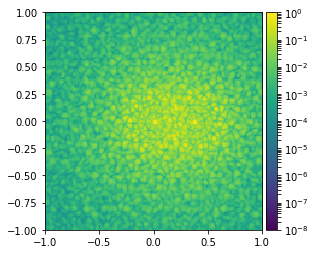

In [7]:
%matplotlib inline
view_psf(image/image.max(axis=None), detector_pitch/1e-3, viewport, vmin=1e-8)
plt.show()

### Tinytol settings

In [10]:
tinytol_settings_1 = {
                    'diam': 0.02,                             # telescope diameter in meters
                    'm1_fl': .077,                            # primary focal length (m)
                    'beam_ratio': 0.4,                        # Initial beam width/grid width
                    'tilt_x': -0.00,                          # Tilt angle along x (arc seconds)
                    'tilt_y': -0.00,                          # Tilt angle along y (arc seconds)
                    'opd_func': binarized_ringed_650_scaled,  # Phase pupil function
                    'use_caching':False,                      # Use cached files if available?
                    }   

tinytol_settings_2 = {
                    'diam': 0.02,                             # telescope diameter in meters
                    'm1_fl': .077,                            # primary focal length (m)
                    'beam_ratio': 0.4,                        # Initial beam width/grid width
                    'tilt_x': 125.,                          # Tilt angle along x (arc seconds)
                    'tilt_y': -0.00,                          # Tilt angle along y (arc seconds)
                    'opd_func': binarized_ringed_650_scaled,  # Phase pupil function
                    'use_caching':False,                      # Use cached files if available?
                    }   


In [11]:
prescription = 'prescription_quad'
gridsize = 2048
detector_pitch = 1.12e-6 # m/pixel on detector
npixels = 512 # Size of detector, in pixels
viewport = .1

In [12]:
# Spectrum 
wl_vals = [.6]    #Micrometer
wl_weights = [1.]

# First source, on axis
source_a = {
            'wavelengths': wl_vals,
            'weights': wl_weights,
            'settings': tinytol_settings_1
            }

# Second source, off axis
source_b = {
            'wavelengths': wl_vals,
            'weights': wl_weights,
            'settings': tinytol_settings_2
            }

sources = [source_a, source_b]

In [9]:
%%time
image = form_detector_image(prescription, sources, gridsize, detector_pitch, npixels)

CPU times: user 1.18 s, sys: 739 ms, total: 1.92 s
Wall time: 12.9 s


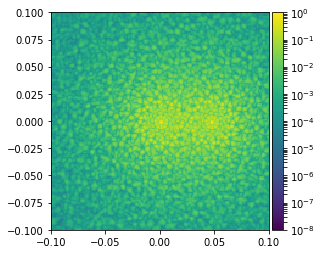

In [10]:
%matplotlib inline
view_psf(image/image.max(axis=None), detector_pitch/1e-3, viewport, vmin=1e-8)
plt.show()

### Comparing the phase applied to the wavefronts in rc_quad vs quad

In [13]:
toliman_settings = {
                    'diam': 0.3,                       # telescope diameter in meters
                    'm1_fl': 571.7300 / 1000.,         # primary focal length (m)
                    'm1_m2_sep': 549.240/1000.,        # primary to secondary separation (m)
                    'm2_fl': -23.3800/1000.,           # secondary focal length (m)
                    'bfl': 590.000 / 1000.,            # nominal distance from secondary to focus (m)
                    'm2_rad': 5.9 / 1000.,             # Secondary half-diameter (m)
                    'm2_strut_width': 0.01,            # Width of struts supporting M2 (m)
                    'm2_supports': 5,                  # Number of support structs (assumed equally spaced)
                    'beam_ratio': 0.4,                 # Initial beam width/grid width
                    'tilt_x': -0.00,                   # Tilt angle along x (arc seconds)
                    'tilt_y': -0.00,                   # Tilt angle along y (arc seconds)
                    'opd_func': binarized_ringed_650,  # Phase pupil function
                    'm1_hole_rad':0.025,               # Radius of hole in primary (m)
                    'use_caching':False,               # Use cached files if available?
                    'get_wf':True
                    }   

tinytol_settings = {
                    'diam': 0.02,                             # telescope diameter in meters
                    'diam': 0.0185,                             # telescope diameter in meters
                    'm1_fl': .077,                            # primary focal length (m)
                    'beam_ratio': 0.4,                        # Initial beam width/grid width
                    'tilt_x': -0.00,                          # Tilt angle along x (arc seconds)
                    'tilt_y': -0.00,                          # Tilt angle along y (arc seconds)
                    'opd_func': binarized_ringed_650_scaled,  # Phase pupil function
                    'use_caching':False,                      # Use cached files if available?
                    'get_wf':True
                    }   


In [14]:
gridsize = 2048
npixels = 512 # Size of detector, in pixels

# Toliman
detector_pitch = 11.0e-6
viewport_tol = 1.

#Tinytol
detector_pitch_tinytol = 1.12e-6
viewport_tinytol = 1.

In [15]:
wl_vals = [0.6]
wl_weights = [1.]

In [16]:
source_tol = {
            'wavelengths': wl_vals,
            'weights': wl_weights,
            'settings': toliman_settings
            }

toliman = [source_tol]

In [17]:
source_tinytol = {
                'wavelengths': wl_vals,
                'weights': wl_weights,
                'settings': tinytol_settings
                }

tinytol = [source_tinytol]

In [122]:
toliman_settings['beam_ratio'] = .99
tinytol_settings['beam_ratio'] = .99

In [123]:
%%time
wfo_tol, wf_tol, sampling = prescription_rc_quad(wl_vals[0]*1e-6,gridsize,PASSVALUE=toliman_settings)
wfo_tinytol, wf_tinytol, sampling = prescription_quad(wl_vals[0]*1e-6,gridsize,PASSVALUE=tinytol_settings)

Got wavefront
Got wavefront
CPU times: user 22.7 s, sys: 911 ms, total: 23.6 s
Wall time: 19.3 s


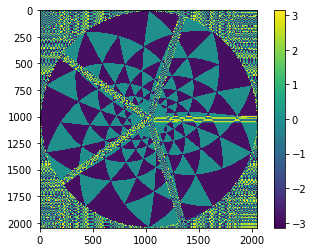

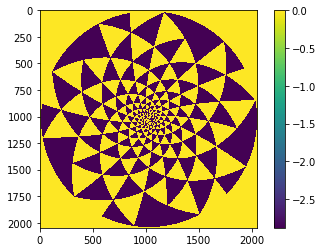

In [124]:
plt.figure(1)
plt.imshow(np.angle(wf_tol))
plt.colorbar()
plt.show()

plt.figure(2)
plt.imshow(np.angle(wf_tinytol))
plt.colorbar()
plt.show()

In [73]:
toliman_settings['beam_ratio'] = 0.2
tinytol_settings['beam_ratio'] = 0.2

In [74]:
%%time
wfo_tol, wf_tol, sampling = prescription_rc_quad(wl_vals[0]*1e-6,gridsize,PASSVALUE=toliman_settings)
wfo_tinytol, wf_tinytol, sampling = prescription_quad(wl_vals[0]*1e-6,gridsize,PASSVALUE=tinytol_settings)

Got wavefront
Got wavefront
CPU times: user 17 s, sys: 1.05 s, total: 18 s
Wall time: 13.4 s


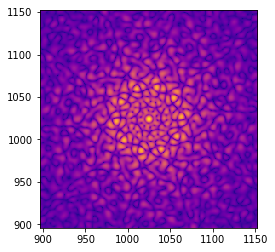

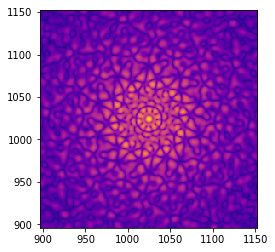

In [79]:
cmap=plt.get_cmap('plasma')

plt.figure(1)
plt.imshow(wfo_tol**0.25,cmap=cmap)
plt.xlim(64*14,64*18)
plt.ylim(64*14,64*18)
plt.show()

plt.figure(2)
plt.imshow(wfo_tinytol**0.25,cmap=cmap)
plt.xlim(64*14,64*18)
plt.ylim(64*14,64*18)
plt.show()

##### Test how tilt affects the prescription WF

In [24]:
toliman_settings['tilt_x'] = 5.
tinytol_settings['tilt_x'] = 100.

In [25]:
%%time
wfo_tol, wf_tol, sampling = prescription_rc_quad(wl_vals[0]*1e-6,gridsize,PASSVALUE=toliman_settings)
wfo_tinytol, wf_tinytol, sampling = prescription_quad(wl_vals[0]*1e-6,gridsize,PASSVALUE=tinytol_settings)

Got wavefront
Got wavefront
CPU times: user 15.9 s, sys: 992 ms, total: 16.9 s
Wall time: 12.3 s


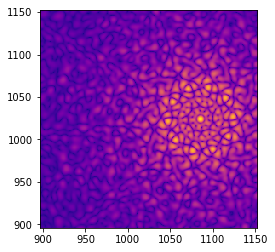

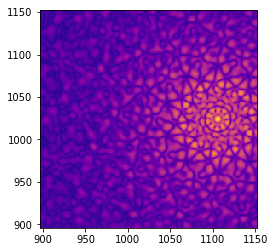

In [26]:
cmap=plt.get_cmap('plasma')

plt.figure(1)
plt.imshow(wfo_tol**0.25,cmap=cmap)
plt.xlim(64*14,64*18)
plt.ylim(64*14,64*18)
plt.show()

plt.figure(2)
plt.imshow(wfo_tinytol**0.25,cmap=cmap)
plt.xlim(64*14,64*18)
plt.ylim(64*14,64*18)
plt.show()

In [27]:
toliman_settings['beam_ratio'] = 0.8
tinytol_settings['beam_ratio'] = 0.8

In [28]:
%%time
wfo_tol, wf_tol, sampling = prescription_rc_quad(wl_vals[0]*1e-6,gridsize,PASSVALUE=toliman_settings)
wfo_tinytol, wf_tinytol, sampling = prescription_quad(wl_vals[0]*1e-6,gridsize,PASSVALUE=tinytol_settings)

Got wavefront
Got wavefront
CPU times: user 19.9 s, sys: 1.08 s, total: 21 s
Wall time: 15.8 s


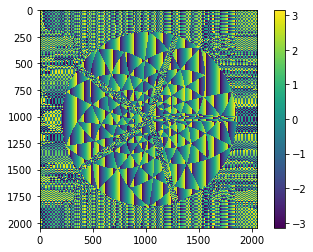

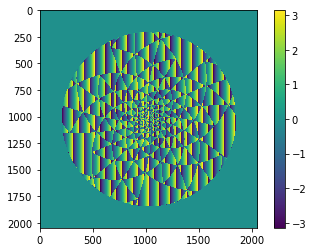

In [30]:
plt.figure(1)
plt.imshow(np.angle(wf_tol))
plt.colorbar()
plt.show()

plt.figure(2)
plt.imshow(np.angle(wf_tinytol))
plt.colorbar()
plt.show()

#### Testing the paramaters to give a full 7200 arcsecond FoV

In [18]:
tinytol_settings_1 = {
                    'diam': 0.02,                             # telescope diameter in meters
                    'm1_fl': .077,                            # primary focal length (m)
                    'beam_ratio': 0.5,                        # Initial beam width/grid width
                    'tilt_x': -0.00,                          # Tilt angle along x (arc seconds)
                    'tilt_y': -0.00,                          # Tilt angle along y (arc seconds)
                    'opd_func': binarized_ringed_650_scaled,  # Phase pupil function
                    'use_caching':False,                      # Use cached files if available?
                    }   

tinytol_settings_2 = {
                    'diam': 0.02,                             # telescope diameter in meters
                    'm1_fl': .077,                            # primary focal length (m)
                    'beam_ratio': 0.5,                        # Initial beam width/grid width
                    'tilt_x': 3600.,                          # Tilt angle along x (arc seconds)
                    'tilt_y': -0.00,                          # Tilt angle along y (arc seconds)
                    'opd_func': binarized_ringed_650_scaled,  # Phase pupil function
                    'use_caching':False,                      # Use cached files if available?
                    }   

In [19]:
prescription = 'prescription_quad'
gridsize = 4*2048
detector_pitch = 1.12e-6 # m/pixel on detector
npixels = 3000 # Size of detector, in pixels
viewport = 1.5

In [20]:
# Spectrum 
wl_vals = [.6]    #Micrometer
wl_weights = [1.]

# First source, on axis
source_a = {
            'wavelengths': wl_vals,
            'weights': wl_weights,
            'settings': tinytol_settings_1
            }

# Second source, off axis
source_b = {
            'wavelengths': wl_vals,
            'weights': wl_weights,
            'settings': tinytol_settings_2
            }

sources = [source_a, source_b]

In [97]:
%%time
image = form_detector_image(prescription, sources, gridsize, detector_pitch, npixels)

CPU times: user 26.4 s, sys: 8.17 s, total: 34.5 s
Wall time: 4min 18s


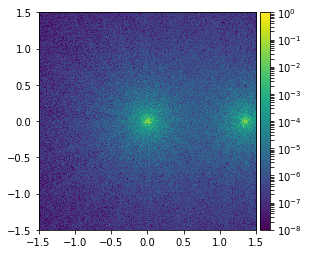

In [98]:
%matplotlib inline
view_psf(image/image.max(axis=None), detector_pitch/1e-3, viewport, vmin=1e-8)
plt.show()

#### Go back to using a scaled version for reasonable run times

In [21]:
tinytol_settings = {
                    'diam': 0.02,                             # telescope diameter in meters
                    'm1_fl': .077,                            # primary focal length (m)
                    'beam_ratio': 0.5,                        # Initial beam width/grid width
                    'tilt_x': -3600.00,                          # Tilt angle along x (arc seconds)
                    'tilt_y': -0.00,                          # Tilt angle along y (arc seconds)
                    'opd_func': binarized_ringed_650_scaled,  # Phase pupil function
                    'use_caching':False,                      # Use cached files if available?
                    'get_wf':False,
                    }   

In [22]:
prescription = 'prescription_quad'
gridsize = 2048*2
detector_pitch = 1.12e-6 # m/pixel on detector
npixels = 2400 # Size of detector, in pixels
viewport = .1

In [23]:
# Spectrum 
wl_vals = [.6]    #Micrometer
wl_weights = [1.]

# First source, on axis
source_a = {
            'wavelengths': wl_vals,
            'weights': wl_weights,
            'settings': tinytol_settings
            }

sources = [source_a]

In [66]:
%%time
image = form_detector_image(prescription, sources, gridsize, detector_pitch, npixels)

CPU times: user 9.33 s, sys: 3.09 s, total: 12.4 s
Wall time: 40.1 s


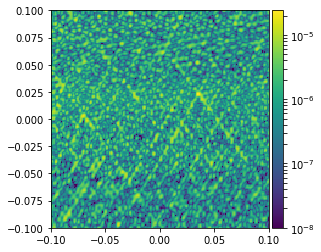

In [69]:
%matplotlib inline
Im = view_psf(image/image.max(axis=None), detector_pitch/1e-3, viewport, vmin=1e-8)
plt.show()

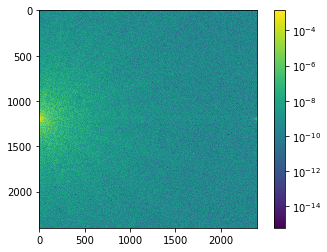

In [70]:
plt.imshow(image, norm=LogNorm())
plt.colorbar()
plt.show()

### Now put in each Star as its own source, seperated by their correct values

In [24]:
Mizar_Aa = {
            'diam': 0.02,                             # telescope diameter in meters
            'm1_fl': .077,                            # primary focal length (m)
            'beam_ratio': 0.5,                        # Initial beam width/grid width
            'tilt_x': -7.0,                          # Tilt angle along x (arc seconds)
            'tilt_y': -0.00,                          # Tilt angle along y (arc seconds)
            'opd_func': binarized_ringed_650_scaled,  # Phase pupil function
            'use_caching':False,                      # Use cached files if available?
            }   

Mizar_Ab = {
            'diam': 0.02,                             # telescope diameter in meters
            'm1_fl': .077,                            # primary focal length (m)
            'beam_ratio': 0.5,                        # Initial beam width/grid width
            'tilt_x': -7.0,                          # Tilt angle along x (arc seconds)
            'tilt_y': -0.00,                          # Tilt angle along y (arc seconds)
            'opd_func': binarized_ringed_650_scaled,  # Phase pupil function
            'use_caching':False,                      # Use cached files if available?
            }   

Mizar_Ba = {
            'diam': 0.02,                             # telescope diameter in meters
            'm1_fl': .077,                            # primary focal length (m)
            'beam_ratio': 0.5,                        # Initial beam width/grid width
            'tilt_x': +7.00,                          # Tilt angle along x (arc seconds)
            'tilt_y': -0.00,                          # Tilt angle along y (arc seconds)
            'opd_func': binarized_ringed_650_scaled,  # Phase pupil function
            'use_caching':False,                      # Use cached files if available?
            }   

Mizar_Bb = {
            'diam': 0.02,                             # telescope diameter in meters
            'm1_fl': .077,                            # primary focal length (m)
            'beam_ratio': 0.5,                        # Initial beam width/grid width
            'tilt_x': +7.00,                          # Tilt angle along x (arc seconds)
            'tilt_y': -0.00,                          # Tilt angle along y (arc seconds)
            'opd_func': binarized_ringed_650_scaled,  # Phase pupil function
            'use_caching':False,                      # Use cached files if available?
            }   

Alcor_A = {
            'diam': 0.02,                             # telescope diameter in meters
            'm1_fl': .077,                            # primary focal length (m)
            'beam_ratio': 0.5,                        # Initial beam width/grid width
            'tilt_x': -708.,                          # Tilt angle along x (arc seconds)
            'tilt_y': -0.00,                          # Tilt angle along y (arc seconds)
            'opd_func': binarized_ringed_650_scaled,  # Phase pupil function
            'use_caching':False,                      # Use cached files if available?
            }  

Alcor_B = {
            'diam': 0.02,                             # telescope diameter in meters
            'm1_fl': .077,                            # primary focal length (m)
            'beam_ratio': 0.5,                        # Initial beam width/grid width
            'tilt_x': -700.,                          # Tilt angle along x (arc seconds)
            'tilt_y': -0.00,                          # Tilt angle along y (arc seconds)
            'opd_func': binarized_ringed_650_scaled,  # Phase pupil function
            'use_caching':False,                      # Use cached files if available?
            }   

source_settings = [Mizar_Aa,Mizar_Ab,Mizar_Ba,Mizar_Bb,Alcor_A,Alcor_B]

In [25]:
prescription = 'prescription_quad'
gridsize = 2048*2
detector_pitch = 1.12e-6 # m/pixel on detector
npixels = 512*2 # Size of detector, in pixels
viewport = .55

In [26]:
# Spectrum 
wl_vals = [.6]    #Micrometer
wl_weights = [1.]

sources= []

for setting in source_settings:
    source = {
                'wavelengths': wl_vals,
                'weights': wl_weights,
                'settings': setting
                }
    sources.append(source)

In [55]:
%%time
image = form_detector_image(prescription, sources, gridsize, detector_pitch, npixels)

CPU times: user 10.5 s, sys: 12 s, total: 22.4 s
Wall time: 3min 5s


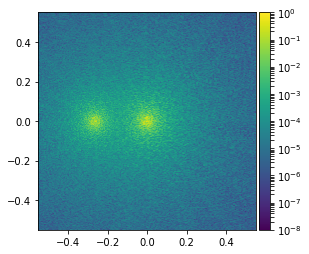

In [60]:
%matplotlib inline
view_psf(image/image.max(axis=None), detector_pitch/1e-3, viewport, vmin=1e-8)
plt.show()

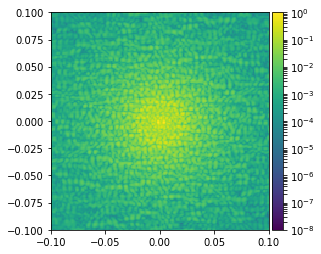

In [62]:
%matplotlib inline

viewport = .1
view_psf(image/image.max(axis=None), detector_pitch/1e-3, viewport, vmin=1e-8)
plt.show()

#### Import the pysynphot spectrums

In [4]:
from spectrum_gen_2 import get_spec, get_counts
spec = get_spec("MizarA", "red", 1150, microns=True)
print(spec[0])
spec = get_spec("MizarA", "green", 1150, microns=True)
print(spec[0])
spec = get_spec("MizarA", "blue", 1150, microns=True)
print(spec[0])

/Users/louis/anaconda3/lib/python3.6/site-packages/pysynphot/locations.py:329: UserWarning: Extinction files not found in /Users/louis/special_project/pysynphot/grp/hst/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


([0.575], [2.980112922254613e-10])
([0.575], [3.025739911905415e-10])
([0.46], [5.845848931578729e-10])


In [5]:
MizarA = {
        'diam': 0.0185,                             # telescope diameter in meters
        'm1_fl': .075,                            # primary focal length (m)
        'beam_ratio': 0.5,                        # Initial beam width/grid width
        'tilt_x': -7.00,                          # Tilt angle along x (arc seconds)
        'tilt_y': -0.00,                          # Tilt angle along y (arc seconds)
        'opd_func': binarized_ringed_650_scaled,  # Phase pupil function
        'use_caching':False,                      # Use cached files if available?
        }   

MizarB = {
        'diam': 0.0185,                             # telescope diameter in meters
        'm1_fl': .075,                            # primary focal length (m)
        'beam_ratio': 0.5,                        # Initial beam width/grid width
        'tilt_x': +7.00,                          # Tilt angle along x (arc seconds)
        'tilt_y': -0.00,                          # Tilt angle along y (arc seconds)
        'opd_func': binarized_ringed_650_scaled,  # Phase pupil function
        'use_caching':False,                      # Use cached files if available?
        }   


source_settings = [MizarA, MizarB]

In [6]:
prescription = 'prescription_quad'
gridsize = 2048*2
detector_pitch = 1.12e-6 # m/pixel on detector
npixels = 2400 # Size of detector, in pixels
viewport = .2

In [37]:
%%time

wl_spacing = 1150
stars = ["MizarA","MizarB"]
colours = ["red","green","blue"]
RGB_images = []


for colour in colours:
    sources = []
    for i in range(len(source_settings)):
        spec = get_spec(stars[i], colour, wl_spacing, microns=True)
        source = {
                'wavelengths': spec[0][0],
                'weights': spec[0][1],
                'settings': source_settings[i],
                }
        sources.append(source)

    im = form_detector_image(prescription, sources, gridsize, detector_pitch, npixels)
    if colour == "red":
        im_out = get_red(im)
    elif colour == "green":
        im_out = get_green(im)
    elif colour == "blue":
        im_out = get_blue(im)
    RGB_images.append(im_out)


CPU times: user 29.6 s, sys: 5.09 s, total: 34.7 s
Wall time: 1min 10s


In [1]:
colours = ["red","green","blue"]
stars = ["MizarA","MizarB"]
bands = ["575-650", "475-600","400-525"]
fps = 10
size = 50

for image,colour,band in zip(RGB_images,colours,bands):
    counts = get_counts(stars[0],colour,fps) + get_counts(stars[1],colour,fps)
    print("{:.0f} counts per frame in the {} band {}nm".format(counts,colour,band))
    norm_im = image/np.sum(image)
    im_out = counts*norm_im
    c = im_out.shape[0]/2
    im_out = im_out[int(c-size):int(c+size),int(c-size):int(c+size)]
    plt.imshow(im_out,norm=LogNorm())
#     plt.imshow(im_out)
    plt.colorbar()
    plt.title(colour)
    plt.show()
    

NameError: name 'RGB_images' is not defined

### Model the image with Fourier Transforms

In [19]:
from FT_model import model_FT

In [22]:
tinytol_settings = {
                    'diam': 0.0185,                             # telescope diameter in meters
                    'm1_fl': .075,                            # primary focal length (m)
                    'beam_ratio': 0.99,                       # Initial beam width/grid width
                    'tilt_x': -0.00,                          # Tilt angle along x (arc seconds)
                    'tilt_y': -0.00,                          # Tilt angle along y (arc seconds)
                    'opd_func': binarized_ringed_650_scaled,  # Phase pupil function
                    'use_caching':False,                      # Use cached files if available?
                    'get_wf':True
                    }   


gridsize = int(4096/2)
npixels = 2048 # Size of detector, in pixels
detector_pitch = 1.12e-6

source_tinytol = {
                'wavelengths': [0.6],
                'weights': [1.],
                'settings': tinytol_settings
                }

tinytol = [source_tinytol]


In [16]:
%%time
wfo_tinytol, wf_tinytol, sampling = prescription_quad(0.6*1e-6,gridsize,PASSVALUE=tinytol_settings)

Got wavefront
CPU times: user 8.54 s, sys: 251 ms, total: 8.79 s
Wall time: 7.83 s


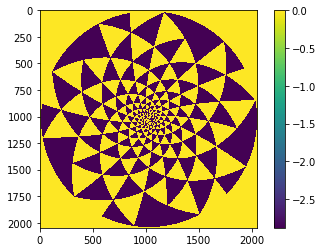

In [17]:
plt.imshow(np.angle(wf_tinytol))
plt.colorbar()
plt.show()

In [23]:
%%time

mask = wf_tinytol
mask_size = tinytol_settings['diam']
chip_dim = npixels
foc_length = tinytol_settings['m1_fl']
pix_size = detector_pitch

spacing = 1150

FT_red = model_FT(mask, mask_size, chip_dim, get_spec("MizarA", "red", spacing)[0][0], foc_length, pix_size)
FT_green = model_FT(mask, mask_size, chip_dim, get_spec("MizarA", "green", spacing)[0][0], foc_length, pix_size)
FT_blue = model_FT(mask, mask_size, chip_dim, get_spec("MizarA", "blue", spacing)[0][0], foc_length, pix_size)

CPU times: user 16.8 s, sys: 1.16 s, total: 18 s
Wall time: 15.5 s


5790 counts per frame in the red band 575-650nm


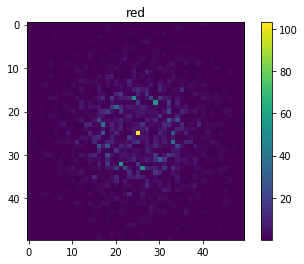

24785 counts per frame in the green band 475-600nm


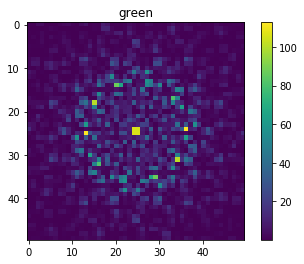

16077 counts per frame in the blue band 400-525nm


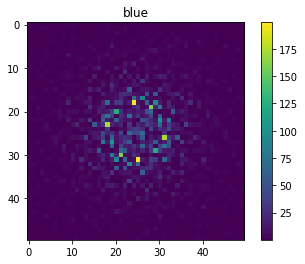

In [34]:
im_red = get_red(FT_red)
im_green = get_green(FT_green)
im_blue = get_blue(FT_blue)

FT_RGB_images = [im_red, im_green, im_blue]

colours = ["red","green","blue"]
stars = ["MizarA","MizarB"]
bands = ["575-650", "475-600","400-525"]
fps = 10
size = 25

for image,colour,band in zip(FT_RGB_images,colours,bands):
    counts = get_counts(stars[0],colour,fps) + get_counts(stars[1],colour,fps)
    print("{:.0f} counts per frame in the {} band {}nm".format(counts,colour,band))
    norm_im = image/np.sum(image)
    im_out = counts*norm_im
    c = im_out.shape[0]/2
    im_out = im_out[int(c-size):int(c+size),int(c-size):int(c+size)]
#     plt.imshow(im_out,norm=LogNorm())
    plt.imshow(im_out)
    plt.colorbar()
    plt.title(colour)
    plt.show()


5790 counts per frame in the red band 575-650nm


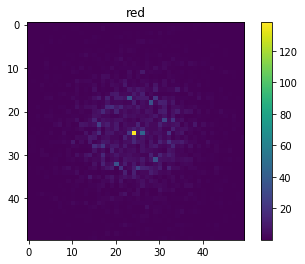

24785 counts per frame in the green band 475-600nm


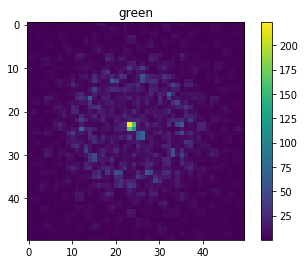

16077 counts per frame in the blue band 400-525nm


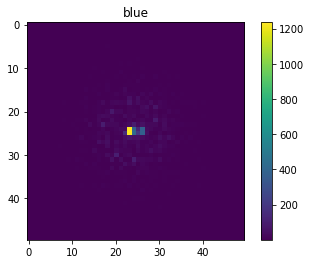

In [39]:
colours = ["red","green","blue"]
stars = ["MizarA","MizarB"]
bands = ["575-650", "475-600","400-525"]
fps = 10
size = 25

for image,colour,band in zip(RGB_images,colours,bands):
    counts = get_counts(stars[0],colour,fps) + get_counts(stars[1],colour,fps)
    print("{:.0f} counts per frame in the {} band {}nm".format(counts,colour,band))
    norm_im = image/np.sum(image)
    im_out = counts*norm_im
    c = im_out.shape[0]/2
    im_out = im_out[int(c-size):int(c+size),int(c-size):int(c+size)]
#     plt.imshow(im_out,norm=LogNorm())
    plt.imshow(im_out)
    plt.colorbar()
    plt.title(colour)
    plt.show()
    